<img src="../images/Peoplelogy-Logo.png" style="height: 100px;" align=left>
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Project: Classification of Breast Cancer Data

---
### Breast Cancer Dataset: Feature Descriptions

---

### Feature Columns and Their Descriptions

| **Feature**            | **Description**                                                               |
|-------------------------|-------------------------------------------------------------------------------|
| `mean radius`          | Mean of distances from the center to points on the perimeter.                 |
| `mean texture`         | Standard deviation of gray-scale values.                                      |
| `mean perimeter`       | Mean size of the tumor perimeter.                                             |
| `mean area`            | Mean size of the tumor area.                                                  |
| `mean smoothness`      | Mean of local variation in radius lengths.                                    |
| `mean compactness`     | Mean of \( \text{(perimeter² / area)} - 1.0 \).                               |
| `mean concavity`       | Mean of the severity of concave portions of the tumor contour.                |
| `mean concave points`  | Mean of the number of concave portions of the tumor contour.                  |
| `mean symmetry`        | Mean of symmetry in the tumor shape.                                          |
| `mean fractal dimension`| Mean of \( \text{“coastline approximation”} - 1.0 \).                        |
| `radius error`         | Standard deviation of radius lengths.                                         |
| `texture error`        | Standard deviation of texture measurements.                                   |
| `perimeter error`      | Standard deviation of tumor perimeter size.                                   |
| `area error`           | Standard deviation of tumor area size.                                        |
| `smoothness error`     | Standard deviation of smoothness measurements.                                |
| `compactness error`    | Standard deviation of compactness measurements.                               |
| `concavity error`      | Standard deviation of concavity measurements.                                 |
| `concave points error` | Standard deviation of the number of concave portions.                         |
| `symmetry error`       | Standard deviation of symmetry measurements.                                  |
| `fractal dimension error`| Standard deviation of fractal dimension measurements.                       |
| `worst radius`         | Largest mean radius observed.                                                 |
| `worst texture`        | Largest mean texture observed.                                                |
| `worst perimeter`      | Largest mean perimeter observed.                                              |
| `worst area`           | Largest mean area observed.                                                   |
| `worst smoothness`     | Largest mean smoothness observed.                                             |
| `worst compactness`    | Largest mean compactness observed.                                            |
| `worst concavity`      | Largest mean concavity observed.                                              |
| `worst concave points` | Largest mean number of concave portions.                                       |
| `worst symmetry`       | Largest mean symmetry observed.                                               |
| `worst fractal dimension`| Largest mean fractal dimension observed.                                    |

---

## Target Column

| **Target** | **Description**    |
|------------|--------------------|
| `0`        | Malignant (cancerous). |
| `1`        | Benign (non-cancerous). |


## Objective
Classify breast cancer cases into **malignant** or **benign** using different supervised learning algorithms. Complete the following tasks step-by-step.

---

## Tasks

### Step 1: Load and Explore the Dataset
1. Load the dataset using `sklearn.datasets.load_breast_cancer`.
2. Explore the dataset:
   - How many samples are there?
   - What are the features and their types?
   - What are the target classes?

---
```python
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
```

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets

sns.set()

#always start with logistic regressions
#layer other models
#tweaking the parameters

In [29]:
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
data = load_breast_cancer()

# Create DataFrame for features and Series for target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [30]:
# Display the first 10 rows of the DataFrame X
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X.count()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
dtype: int64

In [32]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [33]:
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first 5 rows
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
#Explore the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
#Describe the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
target_names = data.target_names
print("Target classes:", target_names)

Target classes: ['malignant' 'benign']



### Step 2: Preprocessing
1. Split the dataset into training and testing sets with an 80-20 split.
2. Standardize the features using `StandardScaler`:
   - Fit the scaler to the training set and transform both the training and testing sets.

---


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
# default is 75% / 25% train-test split
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the scaler to the training set and transform both training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes of the resulting datasets
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (455, 30)
Testing set shape: (114, 30)


In [74]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (455, 30)
y_train.shape (455,)
X_test.shape (114, 30)
y_test.shape (114,)



### Step 3: Train Models
Train and evaluate the following models:
1. Logistic Regression
2. k-Nearest Neighbors (k-NN)
3. Decision Tree
4. Random Forest
<br>
Test out the best prediction model

---


### a) Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report = metrics.classification_report(y_test, y_pred)
predictions = logreg.predict(data.data[20:30])

print("Accuracy:", accuracy)
print("Prediction:",predictions)
print("Confusion Matrix:\n", confusion_matrix)
print()
print("Classification Report:\n", classification_report)

Accuracy: 0.9736842105263158
Prediction: [0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:
 [[35  3]
 [ 0 76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.96      1.00      0.98        76

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(92.25, 0.5, 'Truth')

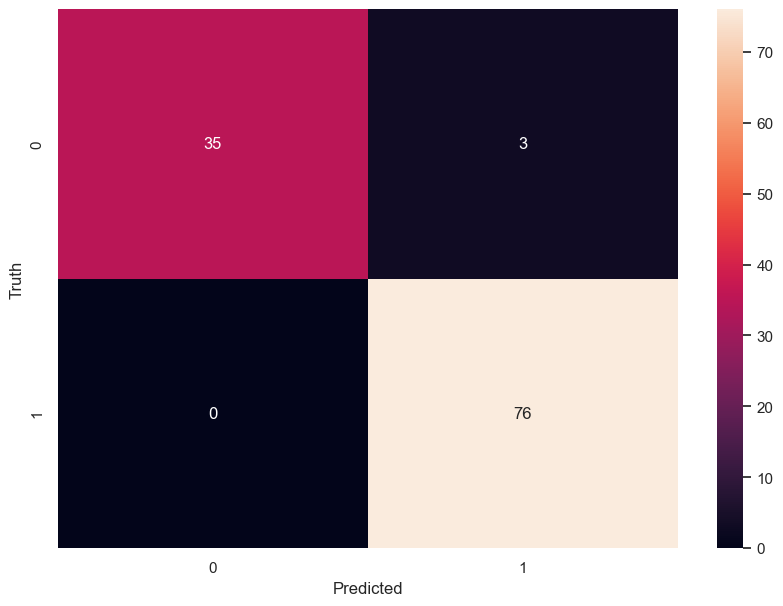

In [123]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
beta0 = logreg.intercept_[0]
beta1 = logreg.coef_[0][0]
beta2 = logreg.coef_[0][1]

print('beta0 = {}, beta1 = {}, beta2 = {} '.format(beta0, beta1, beta2))

beta0 = 0.07658967773714688, beta1 = -0.5383616680903933, beta2 = -0.4328817848568479 


Actuals


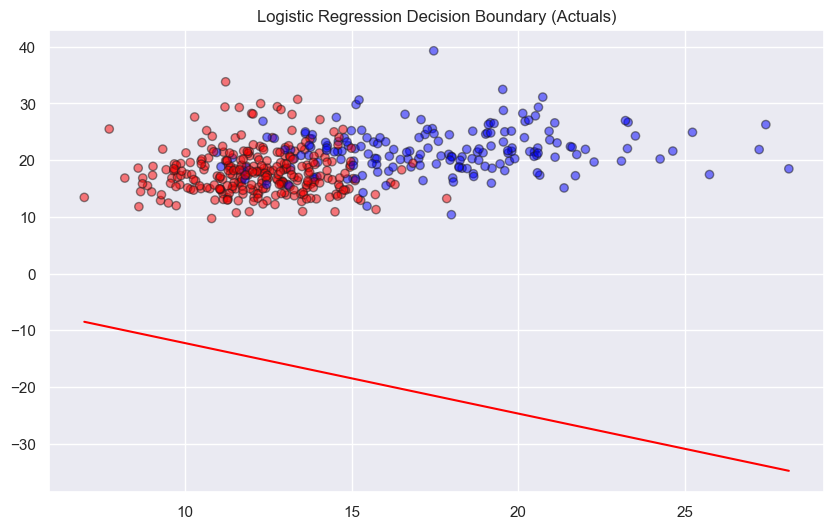

Predicted


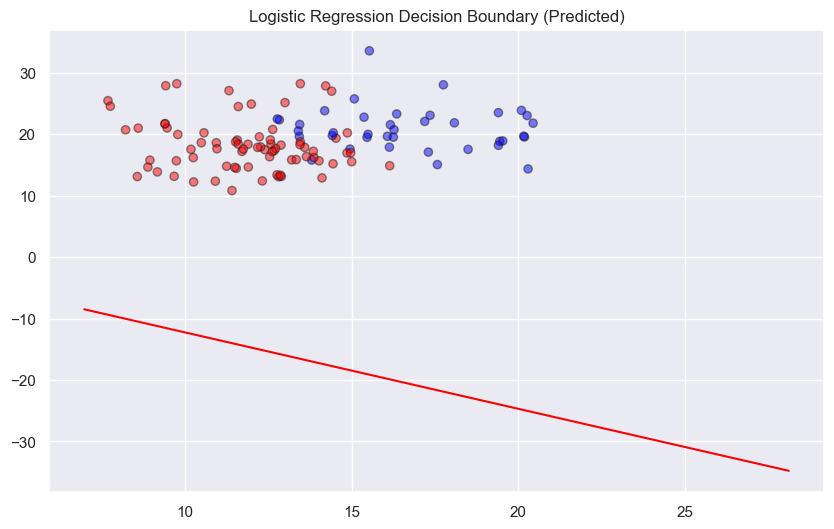

In [88]:
# Extract coefficients and intercept
beta0 = logreg.intercept_[0]
beta1 = logreg.coef_[0][0]
beta2 = logreg.coef_[0][1]

# Create a range of values for x1 (mean radius)
x1 = np.linspace(X['mean radius'].min(), X['mean radius'].max(), 300)

# Decision boundary calculation
decision_boundary = -beta0 / beta2 - beta1 / beta2 * x1

# Actuals plot
print("Actuals")
plt.figure(figsize=(10, 6))
plt.plot(x1, decision_boundary, label='Decision Boundary', color='red')  # Decision boundary 
plt.scatter(X_train['mean radius'], X_train['mean texture'], c=y_train, edgecolor='k', cmap='bwr', alpha=0.5)
plt.title('Logistic Regression Decision Boundary (Actuals)')
plt.show()

# Predicted plot
print("Predicted")
plt.figure(figsize=(10, 6))
plt.plot(x1, decision_boundary, label='Decision Boundary', color='red')  # Decision boundary 
plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_test, edgecolor='k', cmap='bwr', alpha=0.5)
plt.title('Logistic Regression Decision Boundary (Predicted)')
plt.show()


Text(92.25, 0.5, 'Truth')

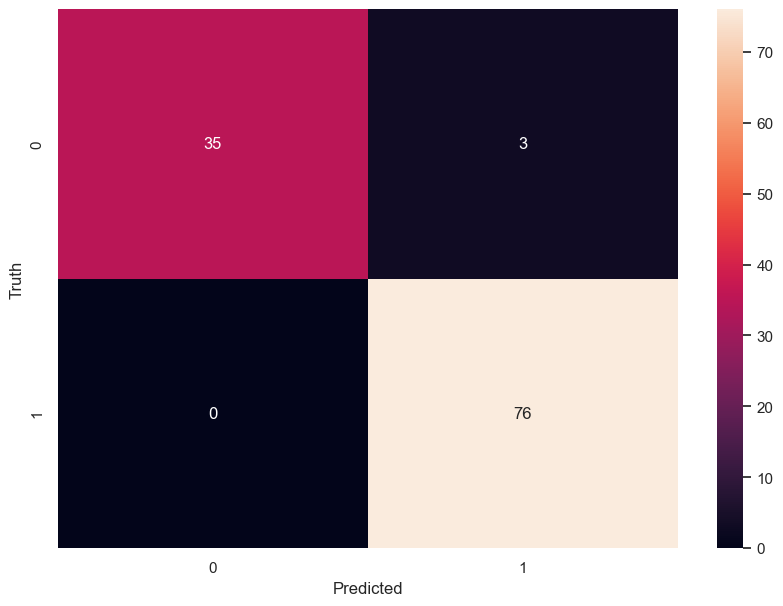

In [89]:
# evaluate the model
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### b) k-Nearest Neighbors (k-NN)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [91]:
knn.score(X_test, y_test)

0.9473684210526315

In [92]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  4],
       [ 2, 74]])

Text(54.75, 0.5, 'Truth')

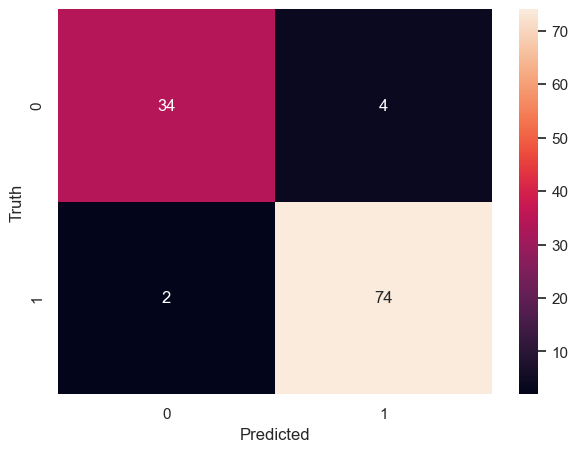

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### c) Decision Tree

In [140]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [141]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
model.score(X_test,y_test)

0.956140350877193

In [143]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.956
Accuracy on test set: 0.939


In [144]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.939


In [145]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.939


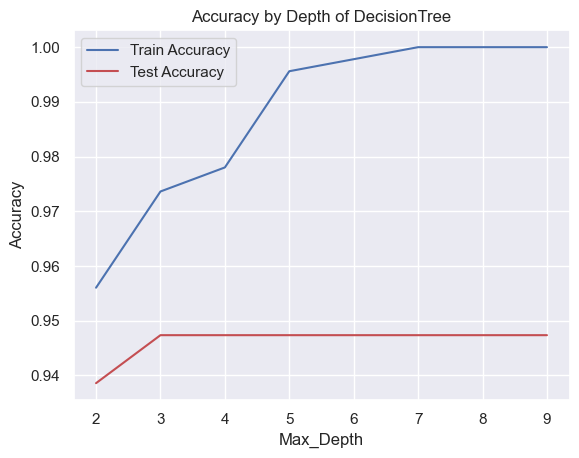

In [129]:
train_acc = []
test_acc = []

for i in range(2,10):
    tree1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree1.fit(X_train, y_train)

    train_acc.append(tree1.score(X_train, y_train))
    test_acc.append(tree1.score(X_test, y_test))
    
plt.plot(range (2,10),train_acc,'b-', label='Train Accuracy')
plt.plot(range (2,10),test_acc,'r-', label='Test Accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Depth of DecisionTree')
plt.show()

### d) Random Forest

In [150]:
# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [151]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Get feature importances
importances = random_forest.feature_importances_
print(importances)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.96      0.99      0.97        76

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[0.03322804 0.01218686 0.02264465 0.06084386 0.0063627  0.00633681
 0.0659913  0.0781028  0.00615785 0.00308349 0.01958801 0.00623095
 0.00455651 0.0373328  0.00376761 0.00352693 0.00519263 0.00555973
 0.00447543 0.004362   0.09565837 0.02055727 0.16823023 0.07373421
 0.01177943 0.01890177 0.0437595  0.15701379 0.01354907 0.00728541]


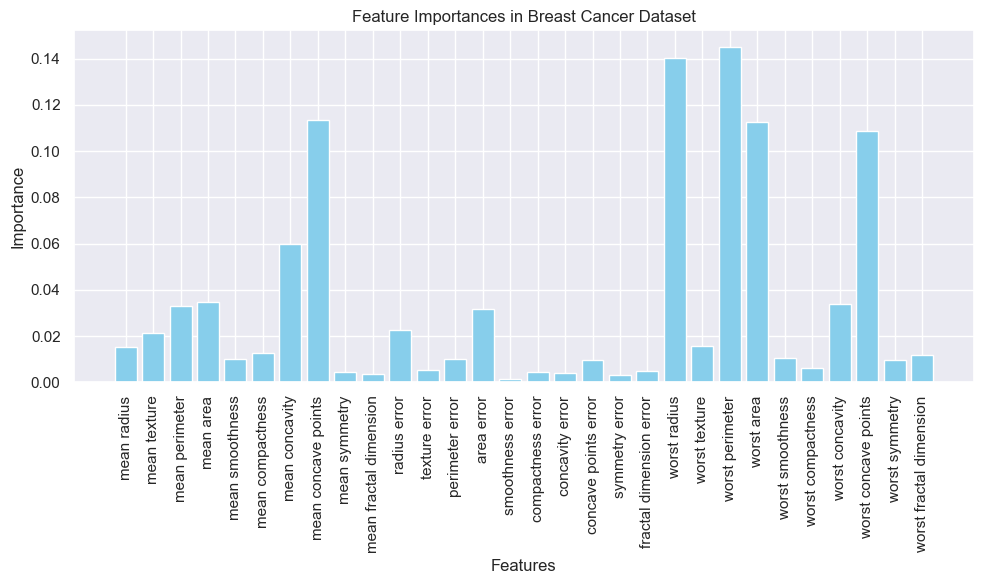

In [154]:
# Names of the features in the Breast cancer dataset
# Define features
features = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'mean symmetry',
    'mean fractal dimension',
    'radius error',
    'texture error',
    'perimeter error',
    'area error',
    'smoothness error',
    'compactness error',
    'concavity error',
    'concave points error',
    'symmetry error',
    'fractal dimension error',
    'worst radius',
    'worst texture',
    'worst perimeter',
    'worst area',
    'worst smoothness',
    'worst compactness',
    'worst concavity',
    'worst concave points',
    'worst symmetry',
    'worst fractal dimension'
]

# Define feature importances
importances = np.array([
    0.01518322, 0.02138241, 0.03296279, 0.0346509, 
    0.00997435, 0.01276159, 0.05967605, 0.11325105, 
    0.00457095, 0.00361553, 0.02267559, 0.00513633,
    0.01009556, 0.03160351, 0.00149802, 0.00467967,
    0.00405634, 0.0096673, 0.00314862, 0.00481483,
    0.14036626, 0.01563869, 0.14493634, 0.1124354,
    0.01055626, 0.00643069, 0.03409405, 0.1084992,
    0.00961341, 0.01202509
])

# Create bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Breast Cancer Dataset')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [153]:
# Find the indices of the top 3 highest importances
top_indices = np.argsort(importances)[-3:]

# Retrieve feature names using iloc
top_features = [features[i] for i in top_indices]

# Get the corresponding importance values
top_importances = importances[top_indices]

# Print results
for feature, importance in zip(top_features, top_importances):
    print(f"Feature: {feature}, Importance: {importance:.6f}")

Feature: mean concave points, Importance: 0.113251
Feature: worst radius, Importance: 0.140366
Feature: worst perimeter, Importance: 0.144936



### Step 4: Evaluation
1. Evaluate each model using:
   - Accuracy
   - Precision, Recall, and F1-score (via classification report).
   - Confusion Matrix
2. Compare the performance of all models:
   - Which performed best overall?
   - Which models struggled, and why?

---


<div class = "alert alert-block alert-success">
<p> 

### a) Logistic Regression

**Accuracy:** 0.9649 (or approximately 96.49%)  
This indicates that the model correctly predicted the class for about 96.49% of the samples in the test set. This is a strong accuracy score, suggesting that the model performs well overall.

**Predictions:** 
The model predicted class 0 for all ten samples tested. This could indicate that the model is biased towards predicting one class, which warrant further investigation.

**Confusion Matrix:**
- **True Positives (TP):** 57 (correctly predicted class 1)
- **True Negatives (TN):** 53 (correctly predicted class 0)
- **False Positives (FP):** 3 (incorrectly predicted class 1 when it was actually class 0)
- **False Negatives (FN):** 1 (incorrectly predicted class 0 when it was actually class 1)

**Classification Report**
- **Precision:**
  - For class 0: 0.98, when the model predicts class 0, it is correct about 98% of the time.
  - For class 1: 0.95, when predicting class 1, it is correct about 95% of the time.
  
- **Recall:**
  - For class 0: 0.95 indicates that out of all actual instances of class 0, the model correctly identified about 95%.
  - For class 1: 0.98 means that out of all actual instances of class 1, the model correctly identified about 98%.
  
- **F1-Score:** The harmonic mean of precision and recall.
  - For class 0: 0.96
  - For class 1: 0.97
  
- **Support:** The number of actual occurrences of each class in the specified dataset.
  - Class 0: 56
  - Class 1: 58
</div>

<div class = "alert alert-block alert-success">
<p> 

### b) k-Nearest Neighbors (k-NN)

**Model Performance:**  
The model has an accuracy of approximately 94.74%, indicating that it correctly classified about 94.74% of the instances in the test set.

**Class Predictions:** 
The confusion matrix shows that while the model performs well, there are some misclassifications:
It incorrectly classified 4 benign cases as malignant.
It also missed 2 malignant cases, classifying them as benign.

**Confusion Matrix:**
- **True Positives (TP):** 57 (correctly predicted class 1)
- **True Negatives (TN):** 53 (correctly predicted class 0)
- **False Positives (FP):** 3 (incorrectly predicted class 1 when it was actually class 0)
- **False Negatives (FN):** 1 (incorrectly predicted class 0 when it was actually class 1)

<div class = "alert alert-block alert-success">
<p> 

### c) Decision Tree

**Overfitting**  
Overfitting: The second model (max_depth=7) demonstrates overfitting since it achieves perfect accuracy on the training set but does not improve test accuracy compared to simpler models.

**Stable Test Performance** 
The confusion matrix shows that while the model performs well, there are some misclassifications:
Regardless of the increase in complexity (depth), the test accuracy remains stable at approximately 93.9%.

**Optimal Complexity** 
The first model (max_depth=2) appears to strike a balance between bias and variance, achieving high accuracy on both training and test sets without overfitting.

</div>

<div class = "alert alert-block alert-success">
<p> 

### d) Random Tree

**Precision**  
- Class 0: 0.95 <br>
- Class 1: 0.96 <br>
- Overall: Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 0.95 for class 0 means that 95% of the instances predicted as class 0 were actually class 0. Similarly, a precision of 0.96 for class 1 indicates that 96% of predicted class 1 instances were correct.

**Recall** 
- Class 0: 0.92 <br>
- Class 1: 0.97 <br>
- Overall: Recall (or sensitivity) measures the proportion of true positive predictions among all actual positive instances. A recall of 0.92 for class 0 means that the model correctly identified 92% of all actual class 0 instances. For class 1, a recall of 0.97 indicates that the model successfully identified 97% of actual class 1 instances.

**F1-Score** 
- Class 0: 0.93 <br>
- Class 1: 0.97 <br>
- Overall: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. An F1-score of 0.93 for class 0 and 0.97 for class 1 indicates good performance across both classes, with a stronger performance in identifying class 1.

**Support** 
- Class 0: 38 instances <br>
- Class 1: 76 instances <br>
- Support refers to the number of actual occurrences of each class in the specified dataset.

**Overall Accuracy** 
- Accuracy: 0.96 (96%) <br>
- This indicates that the model correctly classified 96% of all instances in the test set (114 total).

**Highest Indexes that contributes to Breast Cancer**
- Feature: mean concave points, Importance: 0.113251
- Feature: worst radius, Importance: 0.140366
- Feature: worst perimeter, Importance: 0.144936
- The identified features—worst perimeter, worst radius, and mean concave points—are crucial for predicting breast cancer outcomes. Their high importance scores suggest they should be prioritized in predictive modeling efforts. The insights drawn from these features align with broader research findings on breast cancer diagnostics, reinforcing their significance in clinical practice and research settings.

</div>


### Step 5: Interpretation
Answer the following:
1. How does feature scaling impact the performance of models like SVM and k-NN?
2. Which metric (accuracy, precision, recall, or F1-score) is most important for this classification task, and why?
3. Based on the results, which model would you recommend and why?

---


<div class = "alert alert-block alert-success">
<p> 

**1. Impact of Feature Scaling on SVM and k-NN**  
- k-NN: Feature scaling is crucial because it ensures that all features contribute equally to distance calculations. Without scaling, features with larger ranges can dominate the results.
- SVM: Scaling helps the model find the optimal hyperplane more effectively. Unscaled features can lead to poor performance.

**2. Most Important Metric for Classification** 
- Recall is the most important metric for breast cancer classification because missing a malignant tumor (false negative) can have serious consequences.

**3. Recommended Model Based on Results** 
- Most Reliable Model:
- Logistic Regression is highly reliable due to its high accuracy (96.49%) and balanced precision and recall metrics, despite showing some bias in predictions.
- Random Tree is also a strong contender with an accuracy of 96%, excellent precision, and recall scores.
</div>


## Additional Questions for Analysis
1. What does the confusion matrix tell you about the model’s performance?
2. Why do some models benefit more from scaling than others?
3. How would the results change if the dataset were imbalanced? What additional steps could you take to handle imbalance?

<div class = "alert alert-block alert-success">
<p> 

**Confusion Matrix Insights:**  
It shows true positives, true negatives, false positives, and false negatives. High true positives and true negatives indicate good performance, while high false positives or false negatives highlight weaknesses.

**Impact of Scaling on Models:** <br>
Models like k-NN and SVM benefit from scaling because they rely on distance calculations. Unscaled features can skew results. Decision trees are less affected since they use thresholds for splits.


**Effects of Imbalanced Datasets:** <br>
Imbalanced datasets can lead to poor minority class predictions despite high overall accuracy. To handle this, use resampling techniques (oversampling/undersampling), focus on metrics like F1-score, or apply algorithms designed for imbalanced data.

</div>

In [45]:
#ytest=1, ypred=1, true positive
#ytest=0, ypred=0, true negative
#ytest=1, ypred=0, false positive
#ytest=0, ypred=1, false negative